Spring 2021
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

CIE 555, Neural Networks and Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center">Lab 4</h3>
<h1 align="center">Training Neural Networks: Part I</h3>
<h2 align="center">Overfitting and Regularization</h2>
<h3 align="center">Shahd Seddik</h3>

---

#Lab Objectives
* Understand the key steps when training a deep learning model.
* Understand the relationship between model complexity and overfitting.
* Learn how to detect overfitting and underfitting from a neural network's learning curve.
* Learn how to avoid overfitting using different regularization techniques.

# Steps of Training a Deep Learning Model

1. Define your problem
1. Prepare your data
1. Choose your model and appropriately initialize it
1. Train the chosen model
1. Improve results
1. Present results

# Dataset

One of the most often cited papers about deep learning in combination with a physics application:
*Searching for Exotic Particles in High-Energy Physics with Deep Learning* by Pierre Baldi, Peter Sadowski, Daniel Whiteson.

We will use the [Higgs Dataset](http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz) to train a binary classification model.

The dataset contains 11,000,000 instances, with 28 features each.

Download the dataset `HIGGS.h5` by running the cell below. An H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data and is designed to store large amounts of data efficiently.

Alternatively, you can download the compressed CSV file from [this link](https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz), and then extract it, but you will notice the file is much larger in size.

In [ ]:
!wget http://mlphysics.ics.uci.edu/data/higgs/HIGGS.h5

--2021-04-07 21:50:54--  http://mlphysics.ics.uci.edu/data/higgs/HIGGS.h5
Resolving mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)... 128.195.1.86
Connecting to mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1276002144 (1.2G)
Saving to: ‘HIGGS.h5.2’

HIGGS.h5.2          100%[===================>]   1.19G  38.4MB/s    in 31s     

2021-04-07 21:51:26 (38.8 MB/s) - ‘HIGGS.h5.2’ saved [1276002144/1276002144]



In [ ]:
import numpy as np
import h5py

file_ = h5py.File("HIGGS.h5", 'r')
inputs = np.array(file_["features"])
targets = np.array(file_["targets"])

In [ ]:
print(inputs.shape)
print(targets.shape)

(11000000, 28)
(11000000, 1)


We will take a subset of the data to save time. Skip the next two cells if you want to use the entire dataset.

In [ ]:
n_samples = 20000 # number of samples to take

indices = np.random.randint(inputs.shape[0], size = n_samples) # generate random indices

inputs = inputs[indices, :]
targets = targets[indices, :]

In [ ]:
print(inputs.shape)
print(targets.shape)

(20000, 28)
(20000, 1)


Let's take a look at the data.

In [ ]:
FEATURES = inputs.shape[1]
FEATURES

28

In [ ]:
print(inputs[0])
print(targets[0])

[ 0.57464856 -0.05557038 -0.8686017   0.84472203  0.05533941  0.52353525
 -0.33373293  0.7247294   0.          0.5265284  -1.7309275  -1.2796435
  0.          0.86598885  0.91861373  0.19794606  2.5482244   1.4008081
  1.3678678  -1.5923096   3.1019614   0.81071424  1.2019482   0.98394334
  0.84728026  0.8835719   1.0804981   0.9243242 ]
[0.]


## Pre-processing

Let's split our dataset into training and test sets.

Then, we will fit a pre-processing function to standardize features by removing the mean and scaling to unit variance.

The standard score of a sample $x$ is calculated as

$z = (x - \mu) / \sigma$

where $\mu$ is the mean of the training samples, and $\sigma$ is the standard deviation of the training samples.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
        inputs, targets, test_size=0.10, random_state=42, shuffle=True)

# Set up preprocessing 
preprocessing_input = StandardScaler()
preprocessing_input.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Overfitting and Underfitting

Supervised machine learning can be thought of as approximating a target function $f$ that maps input point $X$ to output $y$ (i.e. $y=f(X)$).

It is crucial that the learned function be able to generalize well over new, unseen data. This allows us to make accurate predictions in the future on data the model has never seen.

So, what is overfitting? And when does it happen? (Discussion)

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1200px-Overfitting.svg.png"
 width="200px"> </center>
 
>- Overfitting refers to the problem when a model learns (or memorizes) the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
- What is meant by the representational capacity of a model?
- (Fill in the blank) Overfitting is more likely to happen when the model has ............... (larger/smaller) representational capacity.


On the other hand, underfitting happens when the model is neither able to model the training data nor able to generalize to new data.

To summarize:
<center><img src="https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvNoby-llz4QzAK15nL%2Fimage.png?alt=media&token=41720ce9-bb66-4419-9bd8-640abf1fc415"
 width="400px"> </center>

 In the context of neural networks, overfitting and underfitting can be detected by looking at the training and validation loss during training.
 
<center><img src="https://drek4537l1klr.cloudfront.net/cai/Figures/08fig06_alt.jpg"
 width="600px"> </center>

 >- (Q) Assuming the three graphs above were generated from three different models over the same dataset. Which model is the most complex? Which is the least?

# Models

Let's build neural nets to solve this classification problem! We will build 4 different models with varying complexities to explore overfitting and underfitting.

Each model will use the same `compile` and `fit` methods, so let's code functions to make our code cleaner and more modular.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

BATCH_SIZE = 500
EPOCHS = 200

def get_optimizer():
  return Adam()

def compile_and_fit(model, optimizer=None, max_epochs=1000, callback = None):
  if optimizer is None:
    optimizer = get_optimizer()
  
  # Compile model and print summary
  model.compile(optimizer = optimizer,
                loss = "binary_crossentropy",
                metrics = ['accuracy'])

  model.summary()

  # Fit model to training data
  history = model.fit(
    x = preprocessing_input.transform(X_train), # do not forget to normalize X
    y = y_train,
    batch_size = BATCH_SIZE,
    epochs = max_epochs,
    validation_split = 0.1,
    callbacks=callback)

  return history

# Create a dictionary to store the histories of all trained models
model_histories = {}

Now, let's get to building our 4 models! We will call them tiny model, small model, medium model, and large model.

In [ ]:
# Model 1
tiny_model = Sequential([
    Dense(16, activation='relu', input_shape=(FEATURES,)),
    Dense(1, activation="sigmoid")
])

# Model 2
small_model = Sequential([
    Dense(16, activation='relu', input_shape=(FEATURES,)),
    Dense(16, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Model 3
medium_model = Sequential([
    Dense(64, activation='relu', input_shape=(FEATURES,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Model 4
large_model = Sequential([
    Dense(512, activation='relu', input_shape=(FEATURES,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Training

In [ ]:
model_histories['Tiny'] = compile_and_fit(tiny_model, max_epochs = EPOCHS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                464       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 15ms/step - loss: 0.9513 - accuracy: 0.4685 - val_loss: 0.8218 - val_accuracy: 0.4761
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7902 - accuracy: 0.4854 - val_loss: 0.7301 - val_accuracy: 0.5111
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7201 - accuracy: 0.5131 - val_loss: 0.6962 - val_accuracy: 0.5361
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.55

In [ ]:
model_histories['Small'] = compile_and_fit(small_model, max_epochs = EPOCHS)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 7ms/step - loss: 0.7906 - accuracy: 0.4943 - val_loss: 0.7155 - val_accuracy: 0.5144
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.5340 - val_loss: 0.6887 - val_accuracy: 0.5528
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5639 - val

In [ ]:
model_histories['Medium']  = compile_and_fit(medium_model, max_epochs = EPOCHS)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1856      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 0.6913 - accuracy: 0.5342 - val_loss: 0.6660 - val_accuracy: 0.6117
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6126 - val_lo

In [ ]:
model_histories['Large'] = compile_and_fit(large_model, max_epochs = EPOCHS)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               14848     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 9ms/step - loss: 0.6644 - accuracy: 0.5884 - val_loss: 0.6

## Plot the training and validation losses

Let's build a function to help us generate clean plots.

In [ ]:
import matplotlib.pyplot as plt
import random

def plotter(history_dict):
  """
  Plots loss, val_loss of multiple models on the same graph.

  Input:
   - history_dict: dictionary of model names (keys) and history objects (values)
  """
  plt.figure(figsize=(8, 6))
  plt.xscale('log')
  #plt.xlim([5, max(plt.xlim())])
  plt.ylim([0.5, 0.7])
  plt.grid(True)
  for model_name in history_dict.keys(): # loop over the passed model names
    history = history_dict[model_name] # get history variable from the dictionary
    plt.plot(history.history['loss'],
             linestyle='-', # solid line
             label = model_name + ' Train')
    plt.plot(history.history['val_loss'],
             linestyle='--', # dashed line
             label = model_name + ' Val')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

  plt.legend(loc='lower left')
  plt.show()

Now, let's compare the learning curves of our four models. What do you notice?

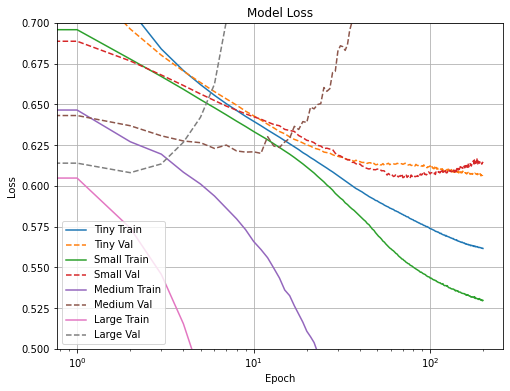

In [ ]:
plotter(model_histories)

# Evaluation

In [ ]:
tiny_loss, tiny_acc = tiny_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.5990


In [ ]:
small_loss, small_acc = small_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.7887 - accuracy: 0.5340


In [ ]:
medium_loss, medium_acc = medium_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 2.2232 - accuracy: 0.5295


In [ ]:
large_loss, large_acc = large_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 4.3190 - accuracy: 0.5355


# Preventing Overfitting

As we have seen, overfitting happens when the model is too complex for the data. That is, when a simpler model exists that can accurately model the data, the more complex model is likely to overfit to the training samples.

To prevent this from happening, we can apply one or more regularization techniques. **Regularization** refers to modifications to the learning algorithm such that the model generalizes better. The idea is to penalize complexity so the model is forced to learn the simplest possible representation of the training data.

Multiple regularization techniques exist, such as:
1. Weight regularization
    1. L1
    2. L2
2. Dropout
3. Early stopping
4. Data augmentation
5. Noise injection

In this lab, we will explore the first three.

## Weight Regularization

One way to penalize complexity is to penalize large weights. This is done by adding all our parameters (weights) to our loss function. The new loss function thus becomes

$ J(w) + \frac{\lambda}{2} \sum_{j=1}^{M}\left|w_{j}\right|^{q}$

>- When $q=1$, we call it **L1 regularization** (we are adding what is called the "L1 norm" of the weights).
- When $q=2$, we call it **L2 regularization** (we are adding what is called the "L2 norm" of the weights).
- (Q) What happens when the parameter $\lambda$ is increased?

In [ ]:
regularizer_histories = {} # new dictioanry to store regularized model histories
regularizer_histories['Tiny'] = model_histories['Tiny']
regularizer_histories['Large'] = model_histories['Large']

In [ ]:
from keras.regularizers import l2

l2_lambda = 0.01
l2_model = Sequential([
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda),
                 input_shape = (FEATURES,)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(1, activation = "sigmoid")
])

regularizer_histories['l2'] = compile_and_fit(l2_model, max_epochs = EPOCHS)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 9ms/step - loss: 12.5335 - accuracy: 0.5508 - val_loss: 4.

## Dropout

The intuitive explanation for dropout is that we need to force each node to output features that are useful on their own.

Dropout involves randomly "dropping out" (i.e. setting to zero) a number of output features of a layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

The "dropout rate" is a hyperparameter specifying the fraction of features that are being zeroed-out; it is usually set between 0.2 and 0.5.

<center><img src="http://cs231n.github.io/assets/nn2/dropout.jpeg"
 width="400px"> </center>

Note that at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [ ]:
from keras.layers import Dropout

dropout_rate = 0.5

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(FEATURES,)),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation = "sigmoid")
])

model_histories['dropout'] = compile_and_fit(dropout_model, max_epochs = EPOCHS)
regularizer_histories['dropout'] = model_histories['dropout']


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              

Now, let's plot the learning curves. What do you notice?

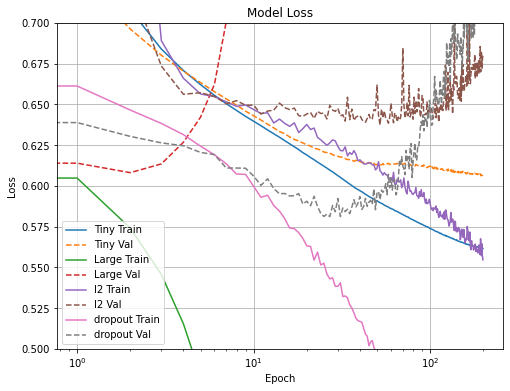

In [ ]:
plotter(regularizer_histories)

>(Discussion) Take another look at the loss curves of the dropout model. The model keeps improving until a certain point, after which it starts overfitting, resulting in a poor final model. Suggest one possible solution that can help improve the final model without changing any of its parameters.

# Task

Your task is to improve the learning curve even further by applying the following models:
1. Model 1: Add both L1 and L2 regularization to the large model. Adjust the parameters to minimize overfitting.
1. Model 2: Apply early stopping to the large model with dropout and choose appropriate parameters.
1. Plot the losses of each of the new models. Comment on your results.

In [ ]:
regularizer_histories = {} # new dictionary to store regularized model histories
regularizer_histories['Large'] = model_histories['Large']

## Model 1



In [ ]:
from keras.regularizers import l1_l2

regularizer = l1_l2(l1= 0.000075, l2= 0.01)

l1_l2_model = Sequential([
    Dense(512, activation = 'relu',
                 kernel_regularizer = regularizer,
                 input_shape = (FEATURES,)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = regularizer),
    Dense(512, activation = 'relu',
                 kernel_regularizer = regularizer),
    Dense(512, activation = 'relu',
                 kernel_regularizer = regularizer),
    Dense(1, activation = "sigmoid")
])

regularizer_histories['l1_l2'] = compile_and_fit(l1_l2_model, max_epochs = EPOCHS)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 11ms/step - loss: 14.3996 - accuracy: 0.5480 - val_loss: 5

### Some of the trials
* **l1= 0.01, l2= 0.000001** : loss: 1.6827 - accuracy: 0.5303 - val_loss: 1.6733 - val_accuracy: 0.5422 ,   ***accuracy gap = 1.19%***


* **l1= 0.0000001, l2= 0.01** : loss: 0.5671 - accuracy: 0.7576 - val_loss: 0.6431 - val_accuracy: 0.7028 ,   ***accuracy gap = 5.48%***     


* **l1= 0.000001, l2= 0.01** : loss: 0.5650 - accuracy: 0.7553 - val_loss: 0.6367 - val_accuracy: 0.7028 ,   ***accuracy gap = 5.25%***

* **l1= 0.00006, l2= 0.01** : loss: 0.5855 - accuracy: 0.7321 - val_loss: 0.6260 - val_accuracy: 0.7028 ,   ***accuracy gap = 2.93%***

* **l1= 0.000075, l2= 0.01** : loss: 0.6075 - accuracy: 0.7171 - val_loss: 0.6321 - val_accuracy: 0.7006 ,   ***accuracy gap = 1.65%***



The first model was the best one that minimized overfitting (with 1.19% accuracy gap). However, the last model minimized overfitting too with an acceptable gap percentage (1.65%) but better training and validation accuracies than the first one, so it is better.

### Plot

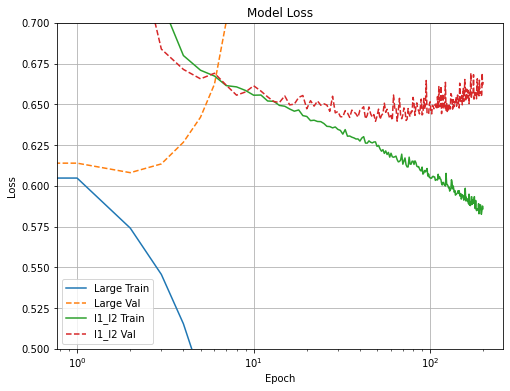

In [ ]:
plotter(regularizer_histories)

## Model 2


In [ ]:
regularizer_histories = {} # new dictionary to store regularized model histories
#regularizer_histories['dropout'] = model_histories['dropout']

In [ ]:
from keras.callbacks import EarlyStopping

c = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=40,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

regularizer_histories['dropout_earlyStopping'] = compile_and_fit(dropout_model, max_epochs = EPOCHS, callback = c)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              

### Plot

In [ ]:
plotter(regularizer_histories)

## Bonus Questions

1. [0.5 pt] In the code above, we used `kernel_regularizer`. What is the difference between `kernel_regularizer`, `bias_regularizer`, and`activity_regularizer` in Keras?
> * kernel_regularizer: reduces the weights (W)
> * bias_regularizer: reduces the bias (b)
> * activity_regularizer: reduces both the weights and bias (Wx+b)

1. [0.5 pt] When should you use each?
> bias regularizer: if I want the output to pass through the origin, activity regularizer: if I want the output to be small, kernel regularizer: If I have no prior knowledge on the distribution of the model.
1. [1 pt] What is the difference between the effect of L1 regularization and that of L2 regularization? Explain in light of the figure below.
<center><img src="https://miro.medium.com/max/602/0*_pKBpbrub8v6np5x.png" width="300px"></center>

    > L1 regularizer can make some weights = 0 as it minimizes the absolute values of the weights, so it is can be used for feature extraction. While L2 does not do so as it minimizes the sum of squared values of the weights.

# References
* https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
* https://github.com/stwunsch/fermilab_keras_workshop
* https://www.tensorflow.org/tutorials/keras/overfit_and_underfit